In [26]:
using AutomaticSingleCellToolbox,DataFrames

In [27]:
?Read10X

search: Read10X @macroexpand1



```
Read10X(Path)
```

Load the output result of 10X Cellranger quantification.

# Arguments

  * `Path::AbstractString`: the directory path of  barcodes.tsv/genes.tsv/matrix.mtx or h5 file.

# Keyword Arguments

  * `min_features::Union{Nothing,Integer} = nothing`: drop cells containing  features less than this number.
  * `min_cells::Union{Nothing,Integer} = nothing`: drop features containing  cells less than this number.


In [28]:
# Download https://cf.10xgenomics.com/samples/cell-exp/1.1.0/pbmc3k/pbmc3k_filtered_gene_bc_matrices.tar.gz
# tar xzvf pbmc3k_filtered_gene_bc_matrices.tar.gz
@time obj = Read10X("filtered_gene_bc_matrices/hg19";min_cells=3)
@time FeaturePercentage!(obj)

[ Info: Currently, only support Cellranger's result!!!
[ Info: Reading matrix directory ...
[ Info: Generating matrix ...
[ Info: Reading barcodes ...


  1.790340 seconds (7.28 M allocations: 803.614 MiB, 7.92% gc time)


[ Info: Reading features/genes ...
[ Info: Gathering basic information
[ Info: There are some duplicated gene names! Add '.numbers' automatically!


  0.028711 seconds (113 allocations: 52.946 MiB)


"Finished!"

[ Info: Drawing counts/features hex plot...


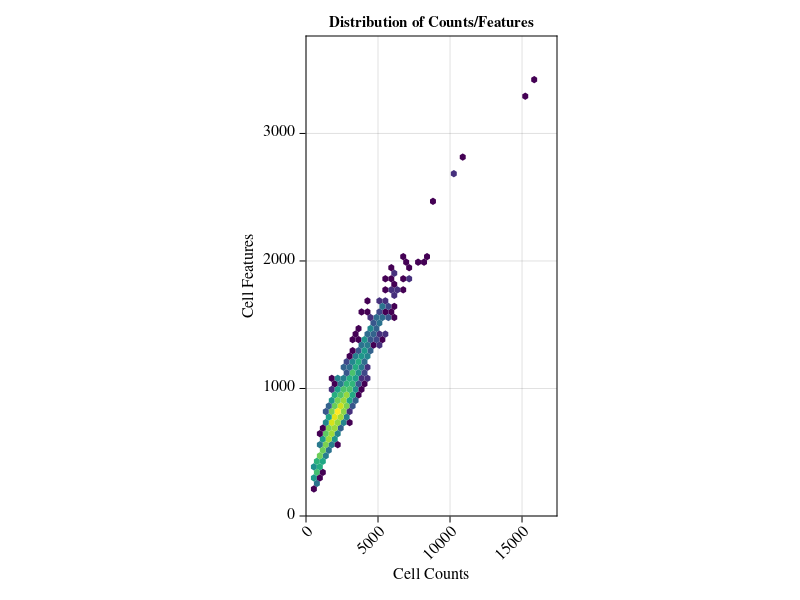

In [29]:
DrawQC(obj)

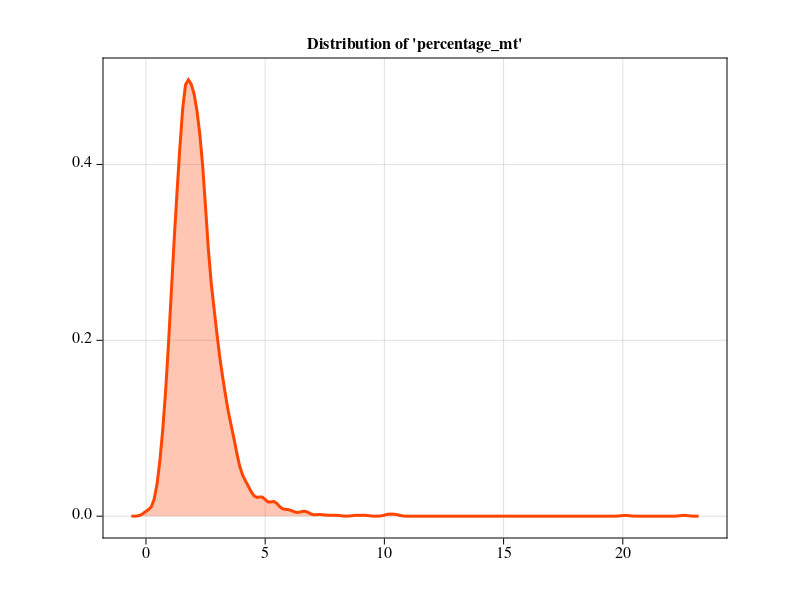

In [30]:
DrawQC(obj;obs_name="percentage_mt")

  0.065477 seconds (22.82 k allocations: 68.641 MiB, 0.16% compilation time)


[ Info: Filtering cells by percentage_mt ...
[ Info: Linear regression for threshold ...
[ Info: The cutoff is about 5.06
[ Info: Filtering cells by the cluster of UMI/Feature
[ Info: Drawing counts/features hex plot...


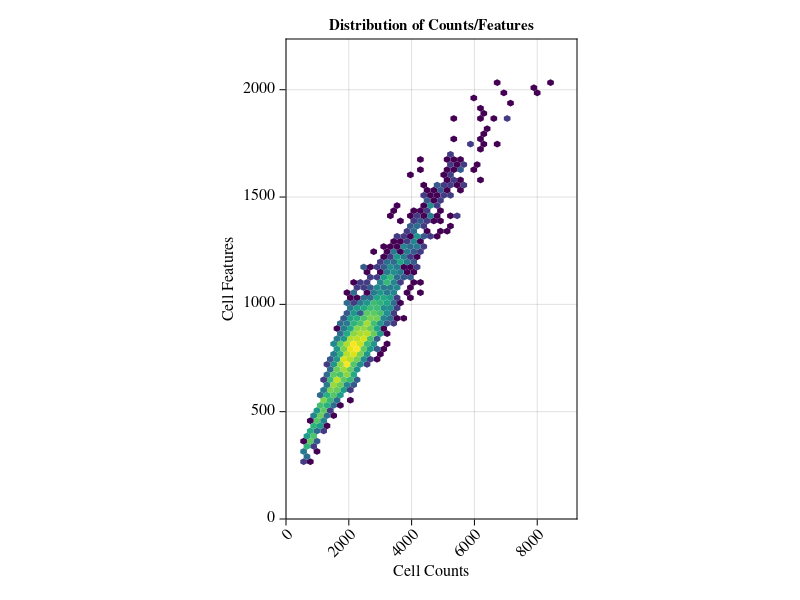

In [31]:
@time AutoFilter!(obj)
DrawQC(obj)

In [32]:
@time NormalizeData!(obj)
@time SelectHVG!(obj) # You can also try the "SelectHVG!(obj;hvg_number=:auto)"

  0.054752 seconds (94.96 k allocations: 97.785 MiB)
  0.250132 seconds (2.74 M allocations: 298.935 MiB, 25.12% gc time)


[ Info: 2000 HVGs were selected automatically!


"Finished!"

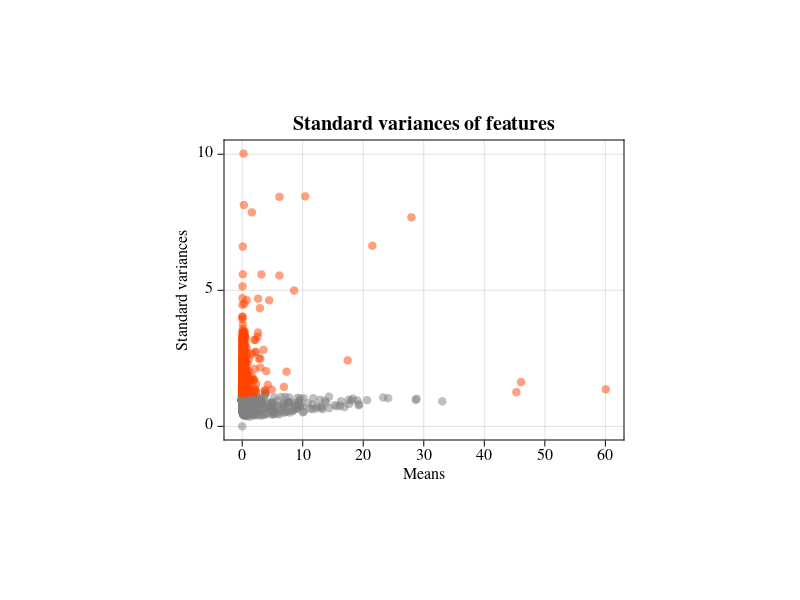

In [33]:
FeatureVariances(obj)

[ Info: Scaling data...
[ Info: Running PCA ...


  2.789695 seconds (860 allocations: 608.172 MiB)


[ Info: Looking for Elbow threshold...
[ Info: We recommend top 10 PCs for downstream analysis automatically!
[ Info: Running UMAP...


  7.231057 seconds (240.70 k allocations: 256.790 MiB, 2.64% gc time)
=============== t-SNE v1.2.1 ===============
fast_tsne data_path: ./tsne_in_2024.3.6.15.59.52-90085.dat
fast_tsne result_path: ./tsne_out_2024.3.6.15.59.52-90085.dat
fast_tsne nthreads: 64


[ Info: Running FIt-SNE ...


Read the following parameters:
	 n 2635 by d 10 dataset, theta 0.500000,
	 perplexity 30.000000, no_dims 2, max_iter 750,
	 stop_lying_iter 250, mom_switch_iter 250,
	 momentum 0.500000, final_momentum 0.800000,
	 learning_rate 219.583333, max_step_norm 5.000000,
	 K -1, sigma -1.000000, nbody_algo 2,
	 knn_algo 1, early_exag_coeff 12.000000,
	 no_momentum_during_exag 0, n_trees 50, search_k 4500,
	 start_late_exag_iter -1, late_exag_coeff -1.000000
	 nterms 3, interval_per_integer 1.000000, min_num_intervals 50, t-dist df 1.000000
Read the 2635 x 10 data matrix successfully. X[0,0] = 4.735402
Will use momentum during exaggeration phase
Computing input similarities...
Using perplexity, so normalizing input data (to prevent numerical problems)
Using perplexity, not the manually set kernel width.  K (number of nearest neighbors) and sigma (bandwidth) parameters are going to be ignored.
Using ANNOY for knn search, with parameters: n_trees 50 and search_k 4500
Going to allocate memory. N: 

[ Info: Max modularity: 0.93487555
[ Info: Max modularity: 0.90918577
[ Info: Max modularity: 0.8883674


 15.879360 seconds (133.44 M allocations: 3.833 GiB, 9.92% gc time)


[ Info: Max modularity: 0.87166995
[ Info: Recommended resolution is 0.4


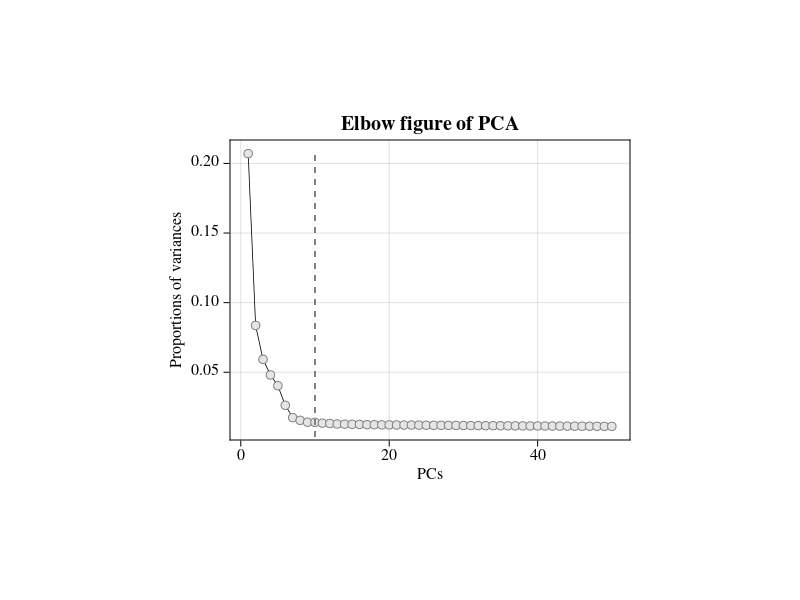

In [34]:
@time PCA!(obj)
@time UMAP!(obj)
@time TSNE!(obj)
@time Clustering!(obj)
ElbowPCA(obj)

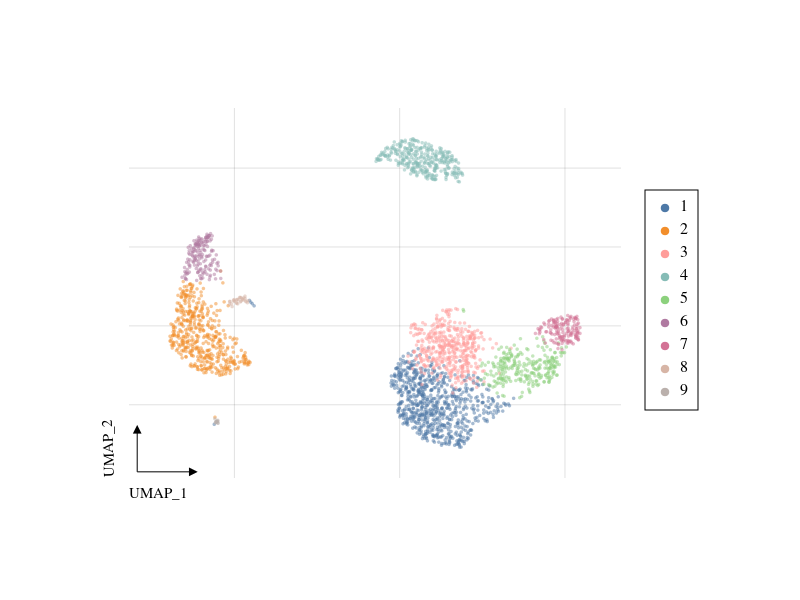

In [35]:
DimensionPoints(obj;path="pbmc3k_umap_dim.pdf")

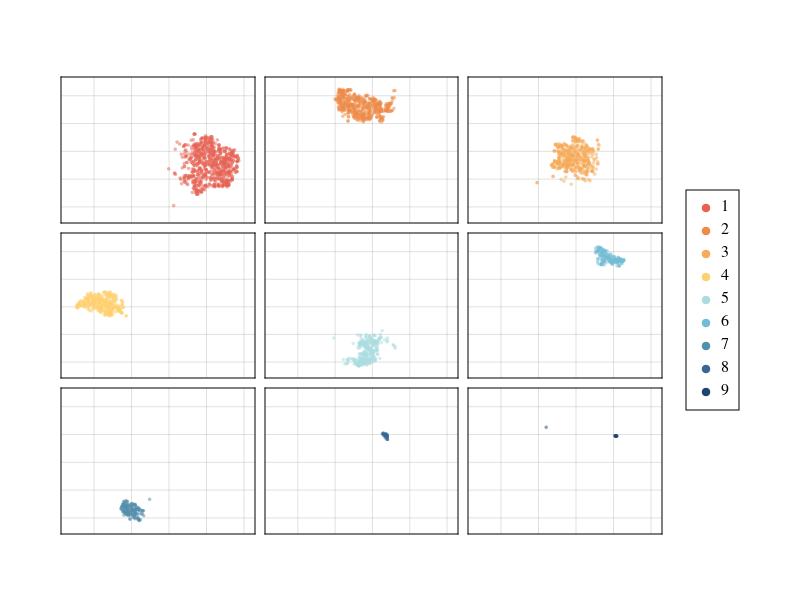

In [36]:
DimensionPoints(obj;dimension_name="tsne",split_name="clusters_latest",path="pbmc3k_tsne_dim.pdf",colorscheme=:Hiroshige)

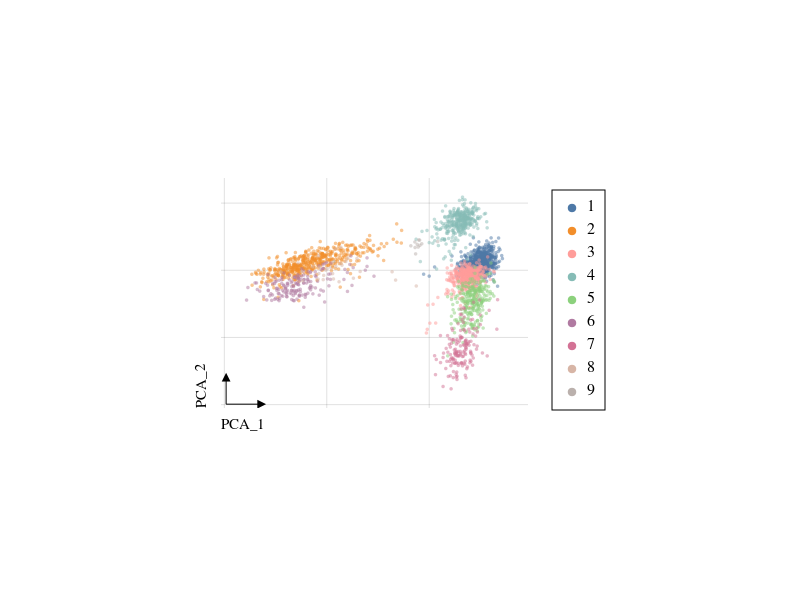

In [37]:
DimensionPoints(obj;dimension_name="pca",width=400,height=300)

In [38]:
@time DE!(obj)

  2.141644 seconds (1.09 M allocations: 1.291 GiB, 8.98% gc time)


"Finished!"

In [39]:
groupby(obj.meta["clusters_latest_DE"],:group) |> 
    x -> combine(x) do y
        first(y,10)
end

Row,group,gene,score,pct1,log2fc
,String,String,Float64,Float64,Float64
1,1,CCR7,0.41635,0.423181,1.3035
2,1,LDHB,0.319986,0.893531,1.07722
3,1,LDLRAP1,0.24444,0.234501,1.05686
4,1,CD3D,0.27912,0.839623,1.02804
5,1,PRKCQ-AS1,0.296455,0.32345,1.01944
6,1,LEF1,0.299131,0.322102,1.01862
7,1,NOSIP,0.293767,0.625337,1.01564
8,1,PIK3IP1,0.29767,0.431267,0.937094
9,1,CD8B,0.159858,0.221024,0.918363


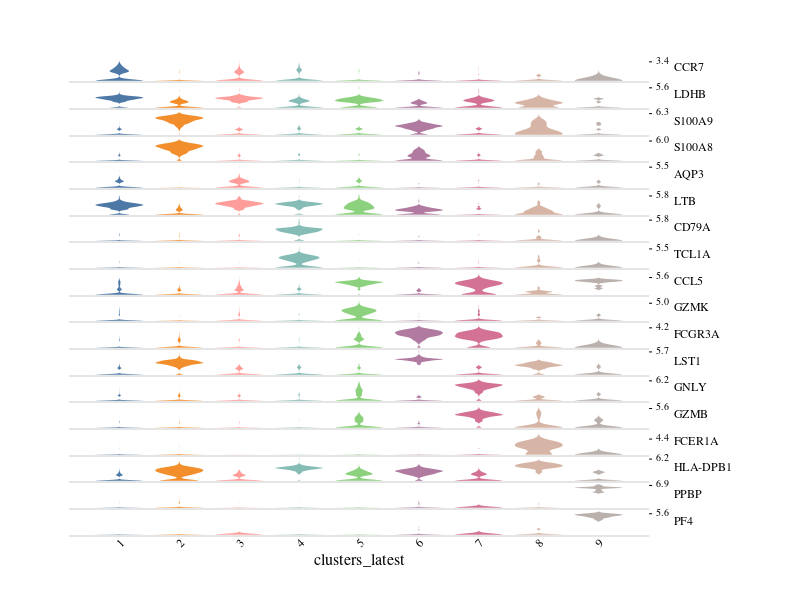

In [40]:
FeatureViolin(obj)

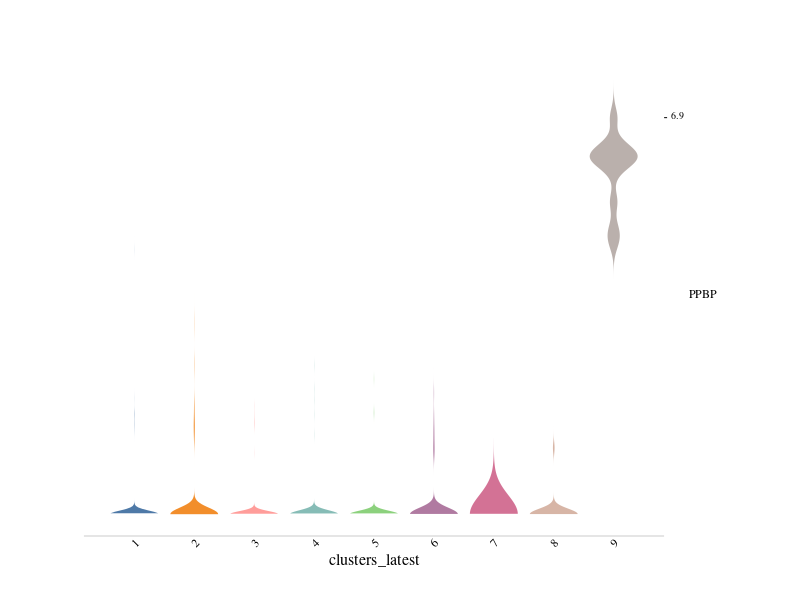

In [41]:
FeatureViolin(obj;features=["PPBP"])

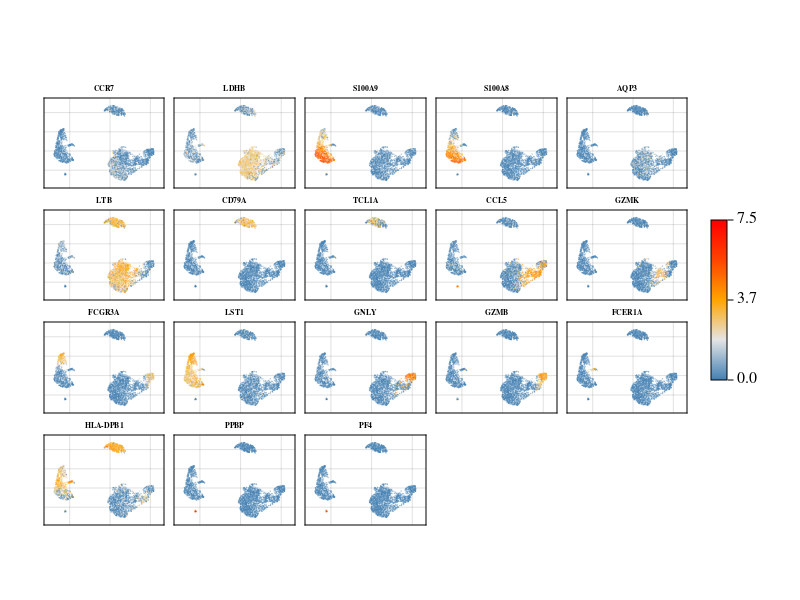

In [42]:
FeatureDimension(obj;point_size=2)

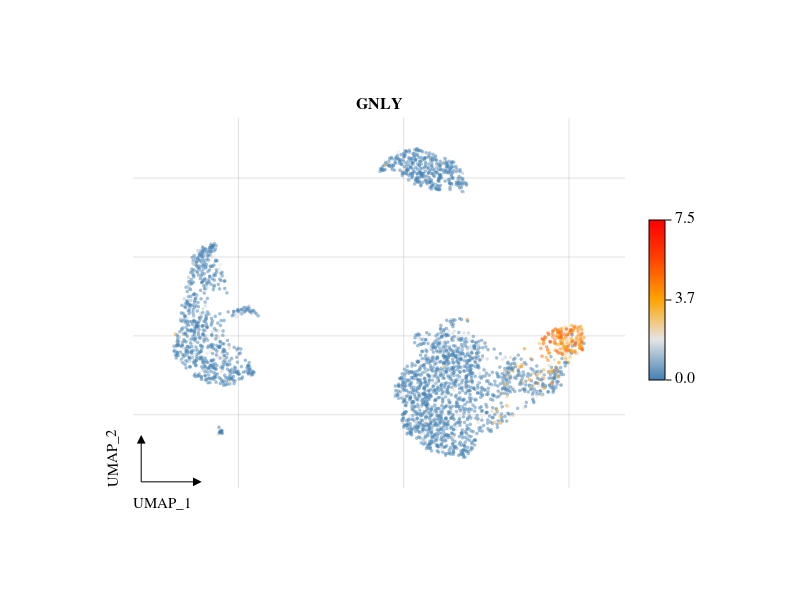

In [43]:
FeatureDimension(obj;features=["GNLY"])

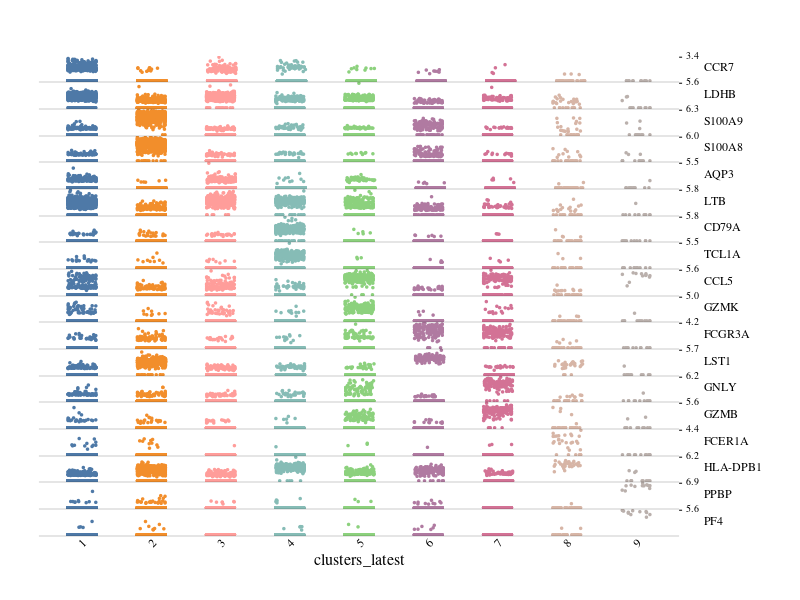

In [44]:
FeatureJitters(obj;jitter_width=0.5)

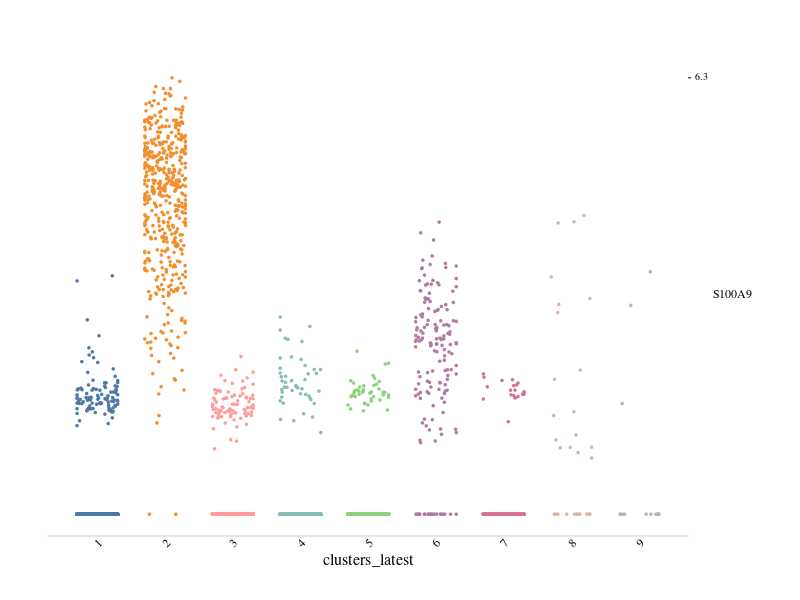

In [45]:
FeatureJitters(obj;features=["S100A9"])

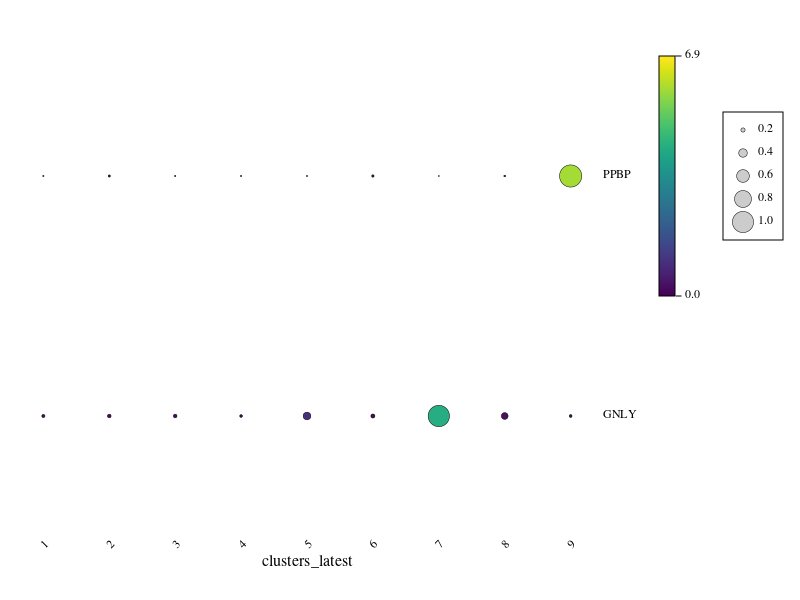

In [46]:
FeatureFracDots(obj;features=["PPBP","GNLY"],colorscheme=:viridis)

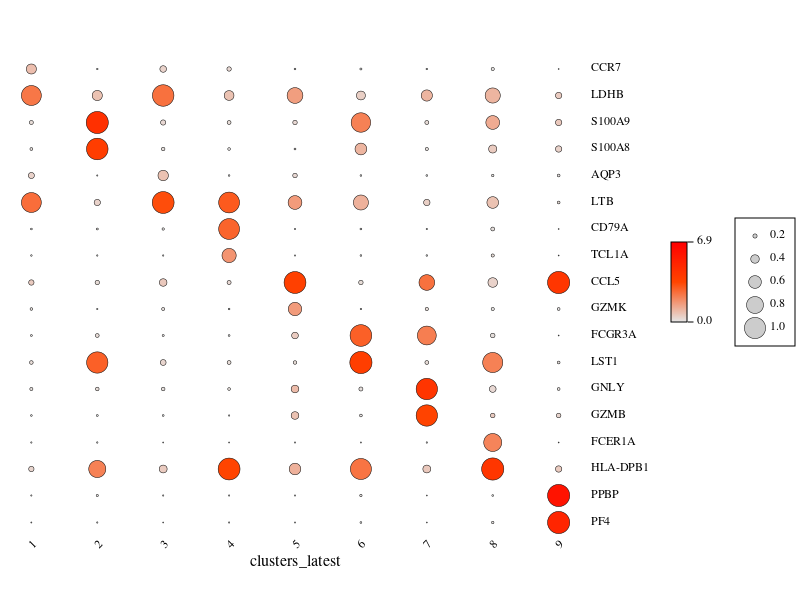

In [47]:
FeatureFracDots(obj)

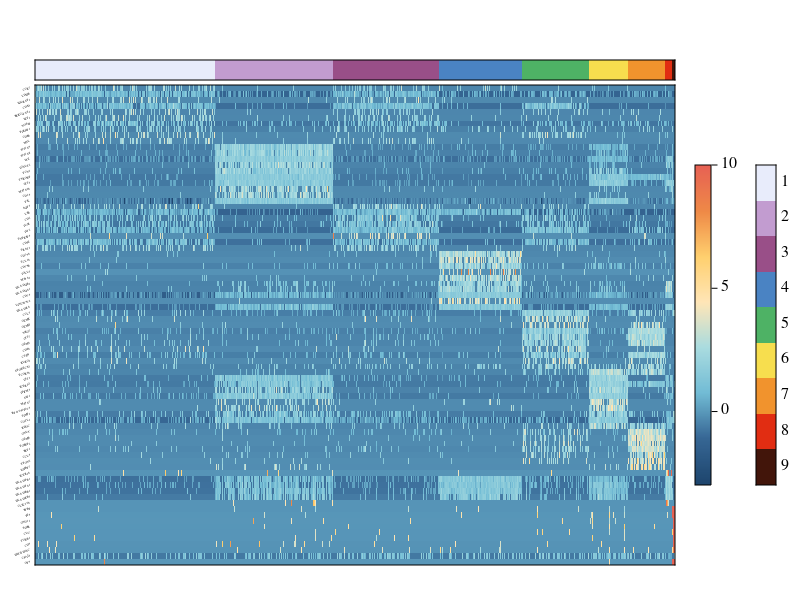

In [48]:
FeatureHeat(obj;gene_label_size=3,path="pbmc3k_heat.pdf")

In [49]:
SaveSeuratV4(obj,"pbmc3k_asct.h5seurat")

"Finished!"

In [50]:
SaveAnnData(obj,"pbmc3k_asct.h5ad")

[ Info: Following scanpy's thoughts, it will drop UMI counts...


"Finished!"